In [8]:
import torch
from PIL import Image
from lavis.processors import load_processor
from lavis.models import load_model

/home/xtest/miniconda3/envs/lavistest/lib/python3.8/site-packages/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(


In [9]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [5]:
import json
import pandas as pd

In [7]:
root_path = "/home/xtest/projects/lavis_test/.cache/lavis/coco/images"

In [3]:
# load json file /home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_t1.json
with open('/home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_t1.json') as json_file:
    t1 = json.load(json_file)

t1[0].keys()

dict_keys(['caption', 'image'])

In [6]:
# list of dict to pandas dataframe
t1_df = pd.DataFrame(t1)
t1_df

,caption,image
0,[Crosswalk with overhead lighting and internal...,test/997.jpg
1,[A selfdriving car system may use a neural net...,test/1711.jpg
2,[Control on a permanent course De Gavers Harel...,test/2907.jpg
3,[ Romes LimitedTraffic Zone ZTL entry control ...,test/384.jpg
4,[ Parking spaces in Ogle Road],test/2913.jpg
5,[Pedestrian detection Pedestrian detection exa...,test/2061.jpg
6,[A 512512 lattice with density of 33 after 640...,test/3605.jpg
7,[ Crosswalk signal at Amsterdam Av and 69 St i...,test/3242.jpg
8,[Traffic calming can be effective on lower spe...,test/975.jpg
9,[Roanoke collision Suffolk accident],test/2368.jpg


In [4]:
t1[0]

{'caption': ['Crosswalk with overhead lighting and internally illuminated overhead crosswalk signs in Germany Deutsch Fußgängerüberweg mit spezieller Beleuchtung Crosswalk with builtin lighting marking the transition zone Русский Пешеходный переход со встроенной системой освещения зоны перехода'],
 'image': 'test/997.jpg'}

In [11]:
# add root_path to image column in t1_df
t1_df['image'] = root_path + '/' + t1_df['image']
t1_df.head()

,caption,image
0,[Crosswalk with overhead lighting and internal...,/home/xtest/projects/lavis_test/.cache/lavis/c...
1,[A selfdriving car system may use a neural net...,/home/xtest/projects/lavis_test/.cache/lavis/c...
2,[Control on a permanent course De Gavers Harel...,/home/xtest/projects/lavis_test/.cache/lavis/c...
3,[ Romes LimitedTraffic Zone ZTL entry control ...,/home/xtest/projects/lavis_test/.cache/lavis/c...
4,[ Parking spaces in Ogle Road],/home/xtest/projects/lavis_test/.cache/lavis/c...


In [12]:
t1_df['image'][0]

'/home/xtest/projects/lavis_test/.cache/lavis/coco/images/test/997.jpg'

## path to checkpoint

In [26]:
ckp_path = '/home/xtest/projects/lavis_test/LAVIS/lavis/output/BLIP/Caption_coco/finetune_on_3topics/checkpoint_best.pth'

### Base Model

In [14]:
from lavis.models import load_model_and_preprocess

In [15]:
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="base_coco", is_eval=True, device=device
)

In [24]:
# for all images in t1_df generate caption, first create raw_image and then preprocess it and the pass it to model.generate and add result as a column to t1_df
t1_df['base_caption'] = t1_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

### run on fintune version

In [27]:
vis_processor = load_processor("blip_image_eval").build(image_size=384)

In [28]:
model = load_model(name="blip_caption", model_type="base_coco", is_eval=True, device=device, checkpoint=ckp_path)

In [29]:
t1_df['fine_caption'] = t1_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

In [36]:
len(t1_df)

15

In [5]:
# show images and base_caption and fine_caption
from IPython.display import display, HTML
import base64
from PIL import Image
import io

def show_image(image):
    img = Image.open(image)
    img = img.resize((384, 384))
    img_byte_arr = io.BytesIO()
    img.save(img_byte_arr, format='PNG')
    # save it also to a file in png format, also drop .jpg from image name
    
    # img.save(image.split('/')[-1].split('.')[0] + '.png')
    
    display(HTML(f'<img src="data:image/png;base64,{base64.b64encode(img_byte_arr.getvalue()).decode()}" />'))




def show_image_and_caption(image, base_caption, fine_caption):
    show_image(image)
    print(f"base_caption: {base_caption}")
    print(f"fine_caption: {fine_caption}")



In [53]:
print(t1_df['image'][4])
print(t1_df['image'][10])
print(t1_df['image'][12])

/home/xtest/projects/lavis_test/.cache/lavis/coco/images/test/2913.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/test/3486.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/test/1380.jpg



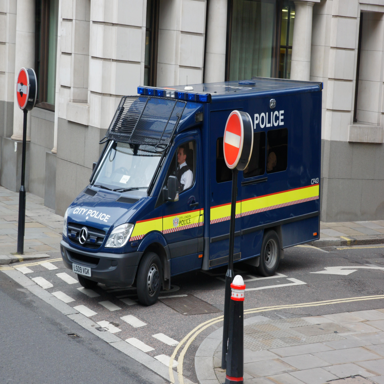

base_caption: a police van parked on the side of the road
fine_caption: a police van on the streets of london


In [135]:
# 4, 10, 12
idx = 12
show_image_and_caption(t1_df['image'][idx], t1_df['base_caption'][idx], t1_df['fine_caption'][idx])


# Ped t2

In [69]:
# load json file /home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_t1.json
with open('/home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_t2.json') as json_file:
    t2 = json.load(json_file)

t2_df = pd.DataFrame(t2)

In [71]:
t2_df['image'] = root_path + '/' + t2_df['image']

In [72]:
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="base_coco", is_eval=True, device=device
)
# for all images in t1_df generate caption, first create raw_image and then preprocess it and the pass it to model.generate and add result as a column to t1_df
t2_df['base_caption'] = t2_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

In [73]:
vis_processor = load_processor("blip_image_eval").build(image_size=384)
model = load_model(name="blip_caption", model_type="base_coco", is_eval=True, device=device, checkpoint=ckp_path)
t2_df['fine_caption'] = t2_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

In [86]:
len(t2_df)

18

In [104]:
print(t2_df['image'][1])
print(t2_df['image'][12])
print(t2_df['image'][15])

/home/xtest/projects/lavis_test/.cache/lavis/coco/images/test/759.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/test/735.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/test/2514.jpg



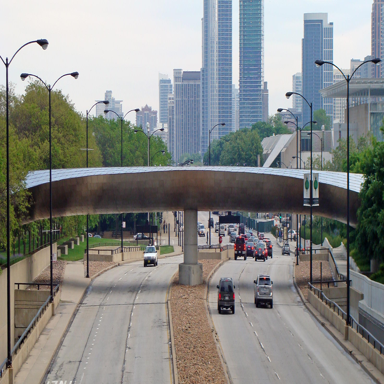

base_caption: a view of a highway with a bridge over it
fine_caption: a pedestrian bridge over the chicago river


In [138]:
# 1, 12, 15
idx = 15
show_image_and_caption(t2_df['image'][idx], t2_df['base_caption'][idx], t2_df['fine_caption'][idx])


### ped t3

In [106]:
# load json file /home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_t1.json
with open('/home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_t3.json') as json_file:
    t3 = json.load(json_file)

t3_df = pd.DataFrame(t3)
t3_df['image'] = root_path + '/' + t3_df['image']

In [107]:
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="base_coco", is_eval=True, device=device
)
# for all images in t1_df generate caption, first create raw_image and then preprocess it and the pass it to model.generate and add result as a column to t1_df
t3_df['base_caption'] = t3_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

In [108]:
vis_processor = load_processor("blip_image_eval").build(image_size=384)
model = load_model(name="blip_caption", model_type="base_coco", is_eval=True, device=device, checkpoint=ckp_path)
t3_df['fine_caption'] = t3_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

In [127]:
print(t3_df['image'][5])
print(t3_df['image'][12])
print(t3_df['image'][13])

/home/xtest/projects/lavis_test/.cache/lavis/coco/images/test/530.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/test/454.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/test/1996.jpg



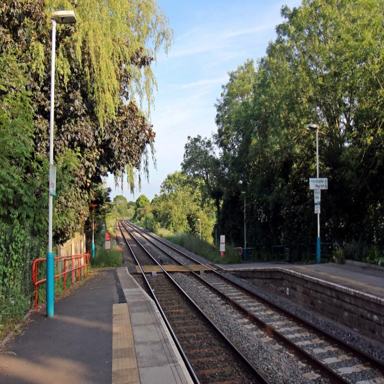

base_caption: a train station with a train on the tracks
fine_caption: the railway platform at the station


In [141]:
# 5, 12, 13
idx = 13
show_image_and_caption(t3_df['image'][idx], t3_df['base_caption'][idx], t3_df['fine_caption'][idx])


# Aircraft

In [142]:
ckp_path = '/home/xtest/projects/lavis_test/LAVIS/lavis/output/BLIP/Caption_coco/av_finetune/checkpoint_best.pth'

In [149]:
root_path = '/home/xtest/projects/lavis_test/.cache/lavis/coco/images'

### t1

In [150]:
# read json file: /home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_av_t1.json
with open('/home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_av_t1.json') as json_file:
    av_t1 = json.load(json_file)

av_t1_df = pd.DataFrame(av_t1)
av_t1_df['image'] = root_path + '/' + av_t1_df['image']

In [153]:
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="base_coco", is_eval=True, device=device
)
# for all images in t1_df generate caption, first create raw_image and then preprocess it and the pass it to model.generate and add result as a column to t1_df
av_t1_df['base_caption'] = av_t1_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

In [154]:
vis_processor = load_processor("blip_image_eval").build(image_size=384)
model = load_model(name="blip_caption", model_type="base_coco", is_eval=True, device=device, checkpoint=ckp_path)
av_t1_df['fine_caption'] = av_t1_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

In [243]:
print(av_t1_df['image'][3])
print(av_t1_df['image'][5])
print(av_t1_df['image'][7])

/home/xtest/projects/lavis_test/.cache/lavis/coco/images/av_cadee/2985.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/av_cadee/349.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/av_cadee/188.jpg



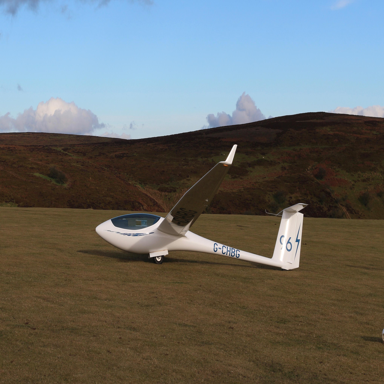

base_caption: a small airplane sitting on top of a grass covered field
fine_caption: a glider aircraft in a field


In [249]:
# 3, 5, 7
idx = 7
show_image_and_caption(av_t1_df['image'][idx], av_t1_df['base_caption'][idx], av_t1_df['fine_caption'][idx])


## t2

In [171]:
# read json file: /home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_av_t1.json
with open('/home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_av_t2.json') as json_file:
    av_t2 = json.load(json_file)

av_t2_df = pd.DataFrame(av_t2)
av_t2_df['image'] = root_path + '/' + av_t2_df['image']

In [172]:
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="base_coco", is_eval=True, device=device
)
# for all images in t1_df generate caption, first create raw_image and then preprocess it and the pass it to model.generate and add result as a column to t1_df
av_t2_df['base_caption'] = av_t2_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

In [173]:
vis_processor = load_processor("blip_image_eval").build(image_size=384)
model = load_model(name="blip_caption", model_type="base_coco", is_eval=True, device=device, checkpoint=ckp_path)
av_t2_df['fine_caption'] = av_t2_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

In [251]:
print(av_t2_df['image'][4])
print(av_t2_df['image'][12])
print(av_t2_df['image'][15])

/home/xtest/projects/lavis_test/.cache/lavis/coco/images/av_cadee/45.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/av_cadee/379.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/av_cadee/3357.jpg



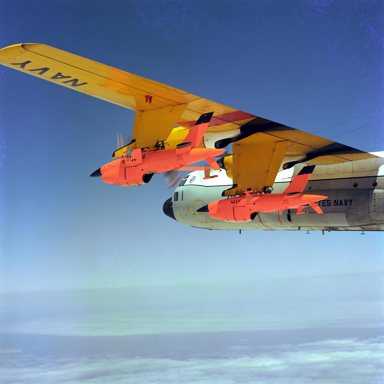

base_caption: an airplane flying in the sky with another plane in the background
fine_caption: a us air force b52a bomber in flight


In [254]:
# 4, 12, 15
# 7
idx = 15
show_image_and_caption(av_t2_df['image'][idx], av_t2_df['base_caption'][idx], av_t2_df['fine_caption'][idx])


### T3

In [195]:
# read json file: /home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_av_t1.json
with open('/home/xtest/projects/lavis_test/.cache/lavis/coco/annotations/coco_karpathy_test_av_t3.json') as json_file:
    av_t3 = json.load(json_file)

av_t3_df = pd.DataFrame(av_t3)
av_t3_df['image'] = root_path + '/' + av_t3_df['image']

In [196]:
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="base_coco", is_eval=True, device=device
)
# for all images in t1_df generate caption, first create raw_image and then preprocess it and the pass it to model.generate and add result as a column to t1_df
av_t3_df['base_caption'] = av_t3_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

In [197]:
vis_processor = load_processor("blip_image_eval").build(image_size=384)
model = load_model(name="blip_caption", model_type="base_coco", is_eval=True, device=device, checkpoint=ckp_path)
av_t3_df['fine_caption'] = av_t3_df['image'].apply(lambda x: model.generate({"image": vis_processors["eval"](Image.open(x).convert("RGB")).unsqueeze(0).to(device)})[0])

In [255]:
print(av_t3_df['image'][3])
print(av_t3_df['image'][8])
print(av_t3_df['image'][14])

/home/xtest/projects/lavis_test/.cache/lavis/coco/images/av_cadee/3844.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/av_cadee/3750.jpg
/home/xtest/projects/lavis_test/.cache/lavis/coco/images/av_cadee/2100.jpg



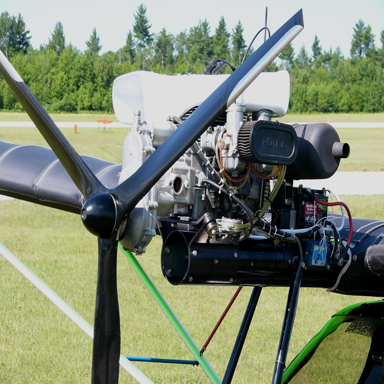

base_caption: a close up of a propeller on a plane
fine_caption: a glider aircraft with a propeller


In [258]:
# 3, 8, 14
# 1, 5
idx = 14
show_image_and_caption(av_t3_df['image'][idx], av_t3_df['base_caption'][idx], av_t3_df['fine_caption'][idx])


In [47]:
from IPython.display import display, HTML
import base64
from PIL import Image
import io

def show_image(image):
    img = Image.open(image)
    img = img.resize((384, 384))
    # rotate image to be vertical
    # img = img.rotate(180, expand=True)
    
    img_byte_arr = io.BytesIO()
    img.save(img_byte_arr, format='PNG')
    # save it also to a file in png format, also drop .jpg from image name
    
    img.save(image.split('/')[-1].split('.')[0] + '.png')
    
    display(HTML(f'<img src="data:image/png;base64,{base64.b64encode(img_byte_arr.getvalue()).decode()}" />'))


In [2]:
! ls /home/xtest/projects/ped_all

aieng	     elephant		  mmlab		   sgg_output	      texts
av_all	     index.html		  ped_all	   stage2	      wsi
code_backup  KnowledgeGraph	  reai		   tensor	      wsi.zip
cookies.txt  lavis_test		  reai.zip	   text_processing
datasets     missed_q50_over_avg  sgg_check_point  text_projects.zip


In [10]:
! ls /home/xtest/projects/ped_all/

images	pd_images.zip  selected.zip  test1_subset


In [33]:
base_path = '/home/xtest/projects/ped_all/images'

In [ ]:
# v1
#1205: Wheelchair bus ramp English Wheelchair bus ramp
#1380: A City of London Police public order carrier LS09VGK 231013 CPS
#2388: Modern Dutch roadside assistance van 2006 English VWVan in use by dutch Wegenwacht Location Hengelo Overijssel Netherlands Nederlands VWbusje van de Wegenwacht Locatie Hengelo Overijssel

#v2
# 3455: Pedestrian walkways linked to Entrance B of the station

# v3
# 3165: Uptown platform at the 71st Street BMT station


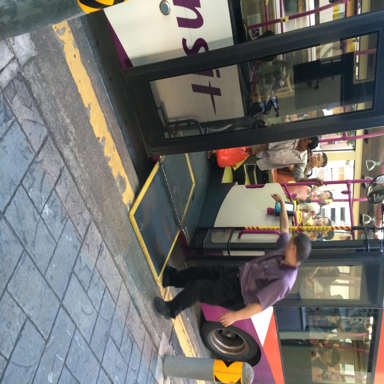

In [44]:
show_image(f'{base_path}/1205.jpg')

In [ ]:
# y 4482: Gliderplane Kestrel made by Glasflügel D0204 JL
# 4490: The Skywhale commissioned for the centenary of Canberra English The balloon Skywhale designed by Patricia Piccinini taking off on its first flight over Canberra
# 261: A Condor IV glider in flight

#v2
# 3124: B58A in flight

#v3:
# 2100: The Rotax 503 engine installation on a Flightstar II English A Flightstar II ultralights Rotax 503 engine installation
# y 2108: Refuelling tube Refuelling tube

In [45]:
base_path = '/home/xtest/projects/av_all/images'


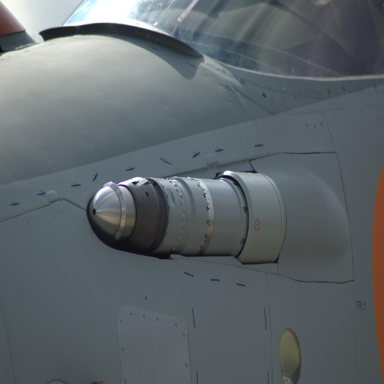

In [48]:
show_image(f'{base_path}/2108.jpg')